In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import os
spc3 = camera_SPC3
# C:\Users\SPUD1\Documents\qudi_workspace_202401\qudi_env310\Scripts\python.exe

In [2]:
spc3.set_binning(binning=1000)
spc3.background_subtraction()

qudi.hardware.camera.SPC3.spc.SPC3Error: COMMUNICATION_ERROR

========= Remote Traceback (1) =========
Traceback (most recent call last):
  File "C:\Users\SPUD1\Documents\experiment_workspace\experiment-main\.venv\lib\site-packages\rpyc\core\protocol.py", line 359, in _dispatch_request
    res = self._HANDLERS[handler](self, *args)
  File "C:\Users\SPUD1\Documents\experiment_workspace\experiment-main\.venv\lib\site-packages\rpyc\core\protocol.py", line 837, in _handle_call
    return obj(*args, **dict(kwargs))
  File "C:\Users\SPUD1\Documents\experiment_workspace\qudi-iqo-modules\src\qudi\hardware\camera\SPC3\spc3_qudi.py", line 341, in background_subtraction
    self.spc3.SnapAcquire()
  File "C:\Users\SPUD1\Documents\experiment_workspace\qudi-iqo-modules\src\qudi\hardware\camera\SPC3\spc.py", line 772, in SnapAcquire
    self._checkError(ec)
  File "C:\Users\SPUD1\Documents\experiment_workspace\qudi-iqo-modules\src\qudi\hardware\camera\SPC3\spc.py", line 153, in _checkError
    raise SPC3Error(ec)
qudi.hardware.camera.SPC3.spc.SPC3Error: COMMUNICATION_ERROR


In [44]:
data_path = "C:/Users/SPUD1/Documents/qudi_workspace_202401/"
filename = 'contacq'
spc3.continuous_acquisition(data_path + filename)
time.sleep(.02)
bytes = 0
while bytes <= 1000 * 256 * 2:  # acquire 256 frames
    bytes = bytes + spc3.get_continuous_memory()
    time.sleep(.02)
spc3.stop_continuous_acquisition()

True

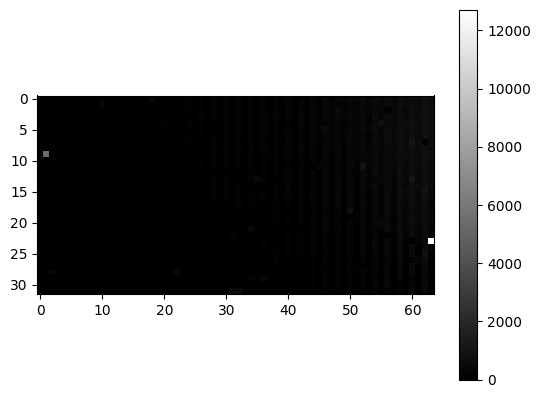

In [45]:
#frames is np array of dimensions (#counters,#frames,#num_rows,#num_columns)
frames = spc3.read_spc3_file(data_path + filename + '.spc3')
plt.imshow(frames[0,10,:,:], cmap='gray') # change second index for different frame
plt.colorbar()
plt.show()

In [46]:
np.shape(np.array(frames))

(1, 126, 32, 64)